In [7]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import squarify

In [8]:
# Load dataset and parse to Dataframe
dataset = pd.read_excel('Dataset.xlsx')
return_table = pd.read_excel('Dataset.xlsx', sheet_name = 4)
segmentation = pd.read_excel('Dataset.xlsx', sheet_name = 5)

In [9]:
# convert comma-separated string to a list of rfm scores of customer segmentation

segmentation['RFM Score'] = segmentation['RFM Score'].str.split(',')
segmentation = segmentation.explode('RFM Score').reset_index(drop=True)
segmentation['RFM Score']= segmentation['RFM Score'].astype(int)
segmentation.sort_values(by='RFM Score')
segmentation

,Segment,RFM Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
120,Lost customers,112
121,Lost customers,121
122,Lost customers,131
123,Lost customers,141


In [10]:
## exclude returned orders
data = pd.merge(dataset, return_table, on=['Order ID'], how="outer", indicator=True)
data = data[data['_merge'] == 'left_only']
# data

In [11]:
#Apply Quintile method to calculate Recency
GR = data.groupby(['Customer ID'])['Order Date'].max().reset_index()
GR = GR.sort_values('Order Date', ascending=False)
R_labels = ['1', '2', '3', '4', '5']
GR['Recency'] = pd.qcut(GR['Order Date'], q=5, labels = R_labels)
today = datetime.datetime.strptime('2017-12-31', '%Y-%m-%d')
GR['recency_day'] = (today - GR['Order Date']).dt.days
GR

,Customer ID,Order Date,Recency,recency_day
391,JM-15580,2017-12-30,5,1
602,PO-18865,2017-12-30,5,1
132,CC-12430,2017-12-30,5,1
101,BP-11185,2017-12-29,5,2
428,KH-16360,2017-12-29,5,2
...,...,...,...,...
636,RE-19405,2014-12-29,1,1098
309,GR-14560,2014-11-21,1,1136
551,NB-18580,2014-10-22,1,1166
167,CR-12625,2014-08-23,1,1226


In [12]:
#Apply Quintile method to calculate Recency
GF = data.groupby(['Customer ID'])['Order ID'].nunique().reset_index()
GF = GF.sort_values('Order ID', ascending=False)
F_labels = ['1', '2', '3', '4', '5']
GF['Frequency'] = pd.qcut(GF['Order ID'], q=5, labels = F_labels)
GF

,Customer ID,Order ID,Frequency
275,EP-13915,17,5
147,CK-12205,13,5
700,SM-20950,12,5
423,KD-16495,12,5
355,JE-15745,12,5
...,...,...,...
546,MW-18235,1,1
301,GH-14665,1,1
344,JC-15385,1,1
49,AR-10570,1,1


In [13]:
#Apply Quintile method to calculate Recency
GM = data.groupby(['Customer ID'])['Sales'].sum().reset_index()
GM = GM.sort_values('Sales', ascending=False)
M_labels = ['1', '2', '3', '4', '5']
GM['Monetary'] = pd.qcut(GM['Sales'], q=5, labels = M_labels)
GM

,Customer ID,Sales,Monetary
698,SM-20320,24516.600,5
739,TC-20980,18951.820,5
728,TA-21385,14595.620,5
433,KL-16645,14175.229,5
6,AB-10105,13881.263,5
...,...,...,...
657,RS-19870,22.328,1
507,MG-18205,16.739,1
145,CJ-11875,16.520,1
455,LD-16855,5.304,1


In [14]:
#caculate RFM score
RFM_table = pd.concat([GR, GF, GM]).groupby(['Customer ID'], as_index=False).first()
RFM_table = RFM_table.sort_values(['Recency', 'Frequency', 'Monetary'], ascending = [False, False, False])
RFM_table['RFM Score'] = RFM_table[["Recency", "Frequency", "Monetary"]].apply("".join, axis=1)
RFM_table['RFM Score'] = RFM_table['RFM Score'].astype(int)
RFM_table


,Customer ID,Order Date,Recency,recency_day,Order ID,Frequency,Sales,Monetary,RFM Score
31,AH-10210,2017-12-24,5,7.0,9.0,5,4805.3440,5,555
35,AI-10855,2017-12-17,5,14.0,10.0,5,4375.7860,5,555
82,BF-11170,2017-12-14,5,17.0,11.0,5,5907.9720,5,555
215,DK-13225,2017-12-20,5,11.0,9.0,5,4802.3940,5,555
275,EP-13915,2017-12-18,5,13.0,17.0,5,5478.0608,5,555
...,...,...,...,...,...,...,...,...,...
713,SS-20515,2016-08-26,1,492.0,3.0,1,613.4000,1,111
726,SW-20755,2016-07-14,1,535.0,1.0,1,663.9640,1,111
758,TS-21085,2017-01-07,1,358.0,2.0,1,4.8330,1,111
759,TS-21160,2016-08-13,1,505.0,4.0,1,552.8160,1,111


In [15]:
#customer segmentation grouping
RFM_Segment = RFM_table.merge(segmentation, how='left', on='RFM Score')
RFM_Segment.columns = RFM_Segment.columns.str.replace('Order ID', 'order quantity')
RFM_Segment

,Customer ID,Order Date,Recency,recency_day,order quantity,Frequency,Sales,Monetary,RFM Score,Segment
0,AH-10210,2017-12-24,5,7.0,9.0,5,4805.3440,5,555,Champions
1,AI-10855,2017-12-17,5,14.0,10.0,5,4375.7860,5,555,Champions
2,BF-11170,2017-12-14,5,17.0,11.0,5,5907.9720,5,555,Champions
3,DK-13225,2017-12-20,5,11.0,9.0,5,4802.3940,5,555,Champions
4,EP-13915,2017-12-18,5,13.0,17.0,5,5478.0608,5,555,Champions
...,...,...,...,...,...,...,...,...,...,...
786,SS-20515,2016-08-26,1,492.0,3.0,1,613.4000,1,111,Lost customers
787,SW-20755,2016-07-14,1,535.0,1.0,1,663.9640,1,111,Lost customers
788,TS-21085,2017-01-07,1,358.0,2.0,1,4.8330,1,111,Lost customers
789,TS-21160,2016-08-13,1,505.0,4.0,1,552.8160,1,111,Lost customers


In [16]:
#Customer value
Segment_cus = RFM_Segment.groupby(['Segment'])['Customer ID'].count().reset_index()
Segment_cus = RFM_Segment.groupby('Segment').agg({'Customer ID': 'count',
                                     'Sales': 'sum',
                                     'recency_day': 'mean'}).reset_index()
Segment_cus.columns = ['segment', 'cus_count', 'total_monetary', 'avg_recency']
Segment_cus.sort_values(by='cus_count', ascending=False, inplace=True)
Segment_cus

,segment,cus_count,total_monetary,avg_recency
9,Potential Loyalist,111,188078.1563,44.468468
1,At Risk,96,385996.8861,259.041667
4,Hibernating customers,93,113882.7190,186.946237
5,Lost customers,83,54264.2255,557.963855
7,Need Attention,76,268450.6204,49.407895
3,Champions,69,376042.6898,28.086957
6,Loyal,61,270352.5752,61.721311
10,Promising,61,221333.1925,34.983607
8,New Customers,60,39806.5270,40.716667
0,About To Sleep,44,46468.5372,129.386364


In [17]:
Segment_cus['count_share'] = Segment_cus['cus_count'] / Segment_cus['cus_count'].sum()
Segment_cus['monetary_share'] = Segment_cus['total_monetary'] / Segment_cus['total_monetary'].sum()
Segment_cus

,segment,cus_count,total_monetary,avg_recency,count_share,monetary_share
9,Potential Loyalist,111,188078.1563,44.468468,0.140329,0.088855
1,At Risk,96,385996.8861,259.041667,0.121365,0.182358
4,Hibernating customers,93,113882.7190,186.946237,0.117573,0.053802
5,Lost customers,83,54264.2255,557.963855,0.104930,0.025636
7,Need Attention,76,268450.6204,49.407895,0.096081,0.126825
3,Champions,69,376042.6898,28.086957,0.087231,0.177655
6,Loyal,61,270352.5752,61.721311,0.077118,0.127724
10,Promising,61,221333.1925,34.983607,0.077118,0.104565
8,New Customers,60,39806.5270,40.716667,0.075853,0.018806
0,About To Sleep,44,46468.5372,129.386364,0.055626,0.021953


In [18]:
# # show distribution of each variable of the model
# colnames = ['recency_day', 'order quantity', 'Sales']

# for col in colnames:
#     fig, ax = plt.subplots(figsize=(12,3))
#     sns.distplot(RFM_Segment[col])
#     ax.set_title('Distribution of %s' % col)
#     plt.show()

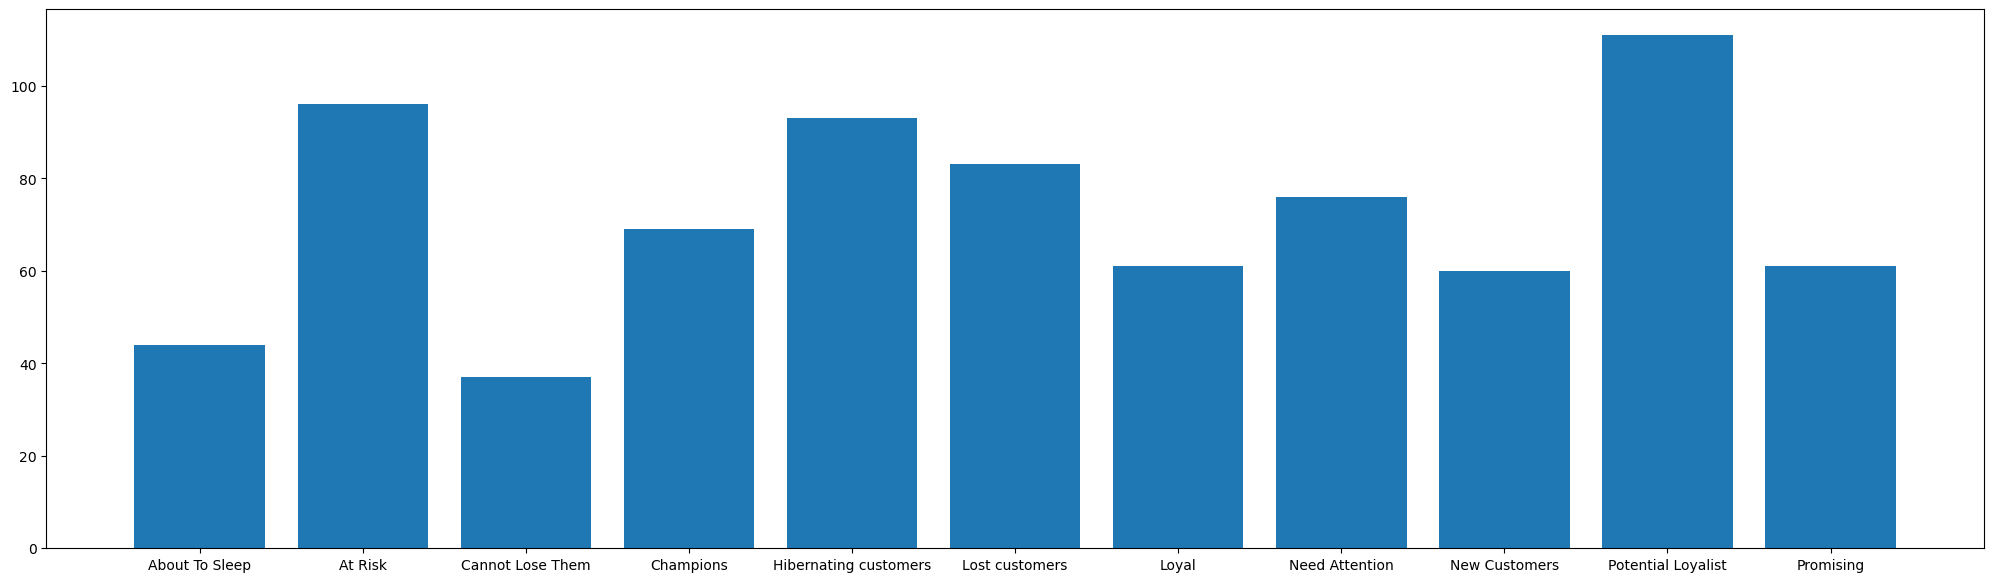

In [19]:
# number of customers of each segment
Segment_customer = RFM_Segment.groupby(['Segment'])['Customer ID'].count().reset_index()
fig = plt.figure(figsize = (25, 7))
plt.bar(Segment_customer['Segment'], Segment_customer['Customer ID'], width = 0.8)
plt.show()

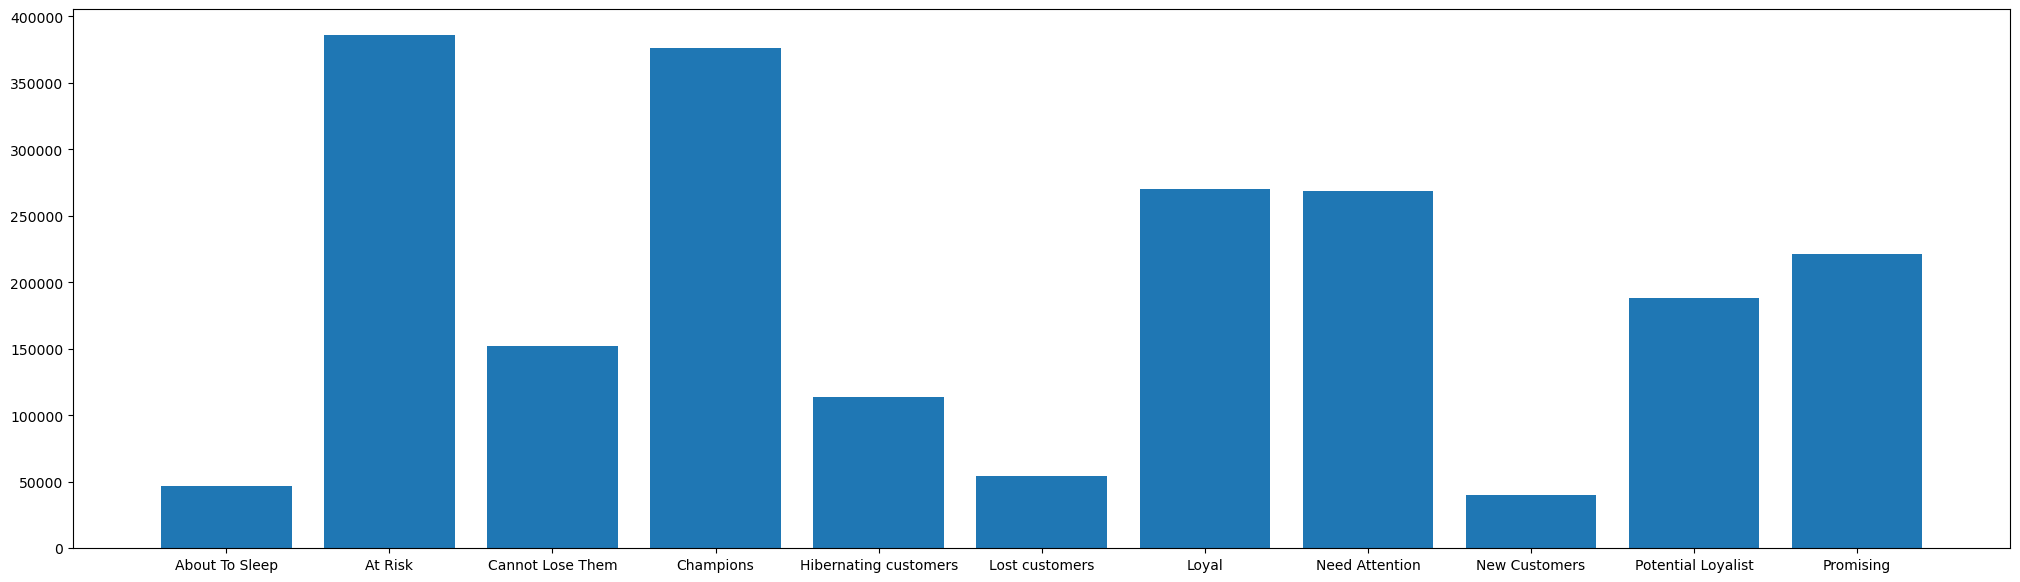

In [20]:
# Sales of each Segment
Segment_Frequency = RFM_Segment.groupby(['Segment'])['Sales'].sum().reset_index()
fig = plt.figure(figsize = (25, 7))
plt.bar(Segment_Frequency['Segment'], Segment_Frequency['Sales'], width = 0.8)
plt.show()

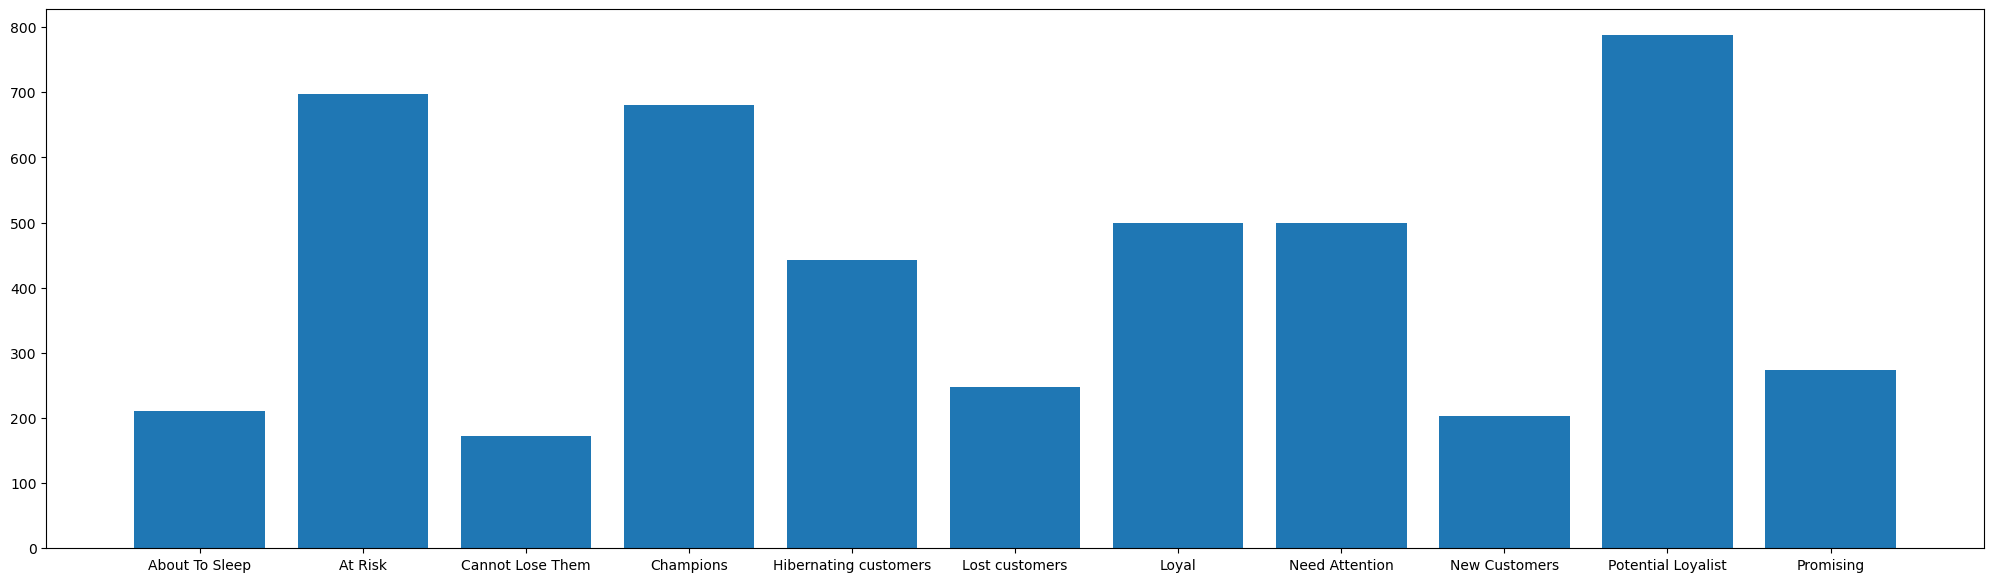

In [21]:
# order quantity of each segment
Segment_Order = RFM_Segment.groupby(['Segment'])['order quantity'].sum().reset_index()
fig = plt.figure(figsize = (25, 7))
plt.bar(Segment_Order['Segment'], Segment_Order['order quantity'], width = 0.8)
plt.show()

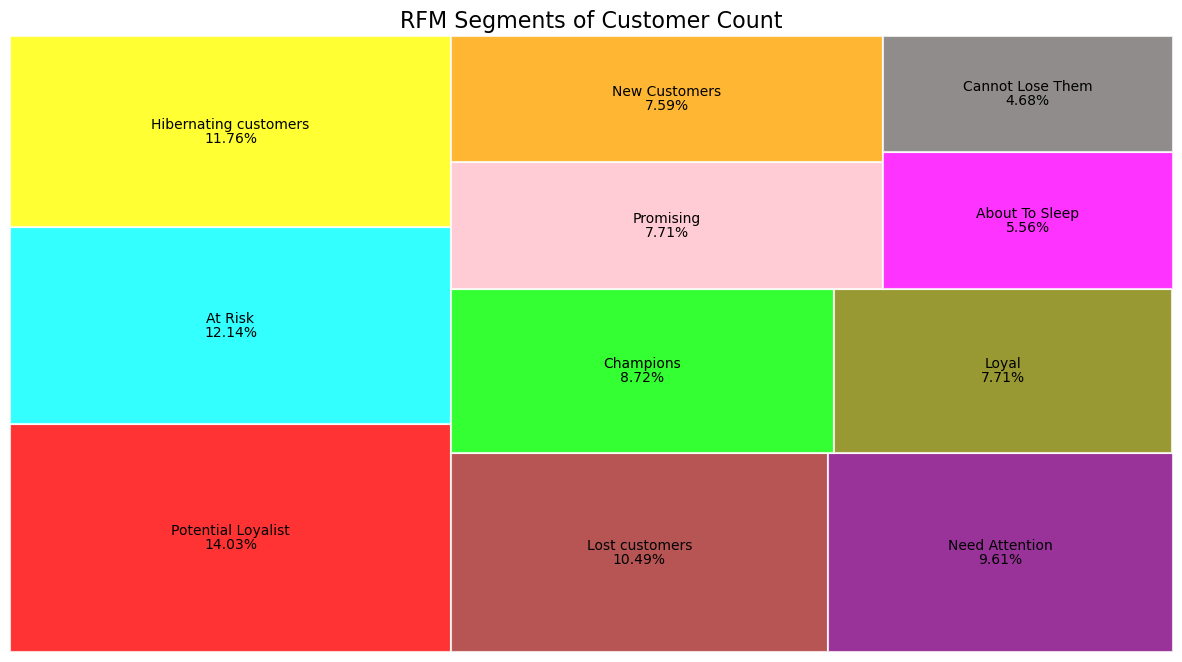

In [22]:
colors = ['#FF0000','#00FFFF','#FFFF00','#A52A2A','#800080','#00FF00','#808000','#FFC0CB','#FFA500','#FF00FF','#736F6E']

fig, ax = plt.subplots(1, figsize = (15,8))

squarify.plot(sizes=Segment_cus['cus_count'], 
              label=Segment_cus['segment'],
              value=[f'{x*100:.2f}%' for x in Segment_cus['count_share']],
              alpha=.8,
              color=colors,
              bar_kwargs=dict(linewidth=1.5, edgecolor="white")
             )
plt.title('RFM Segments of Customer Count', fontsize=16)
plt.axis('off')
plt.show()

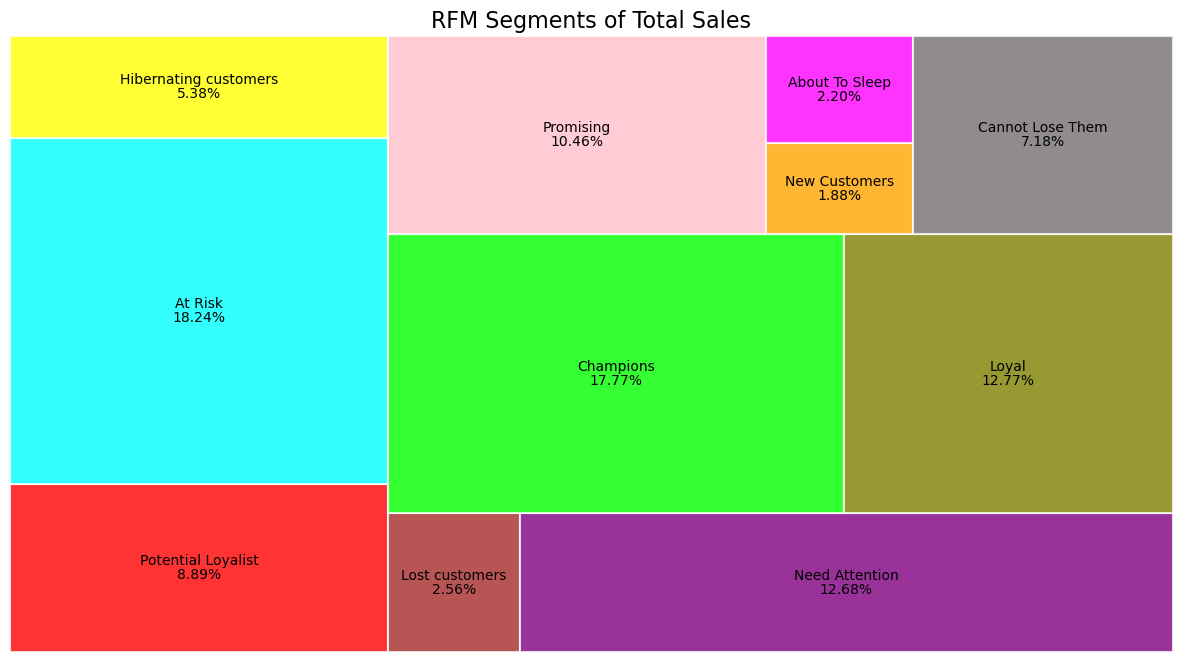

In [23]:
colors = ['#FF0000','#00FFFF','#FFFF00','#A52A2A','#800080','#00FF00','#808000','#FFC0CB','#FFA500','#FF00FF','#736F6E']

fig, ax = plt.subplots(1, figsize = (15,8))

squarify.plot(sizes=Segment_cus['monetary_share'], 
              label=Segment_cus['segment'],
              value=[f'{x*100:.2f}%' for x in Segment_cus['monetary_share']],
              alpha=.8,
              color=colors,
              bar_kwargs=dict(linewidth=1.5, edgecolor="white")
             )
plt.title('RFM Segments of Total Sales', fontsize=16)
plt.axis('off')
plt.show()

### Definition and recommended action for each customer segment:

| Segment | Characteristics | Recommendation |
| --- | --- | --- |
| Champions | Bought recently, buy often and spend the most! | Reward them. Can be early adopters for new products. Will promote your brand. |
| Loyal | Spend good money with us often. Responsive to promotions. | Upsell higher value products. Ask for reviews. Engage them. |
| Potential Loyalist | Recent customers, but spent a good amount and bought more than once. | Offer membership / loyalty program, recommend other products. |
| New customers | Bought most recently, but not often. | Provide on-boarding support, give them early success, start building relationship. |
| Promising | Recent shoppers, but haven’t spent much. | Create brand awareness, offer free trials |
| Need attention | Above average recency, frequency and monetary values. May not have bought very recently though. | Make limited time offers, Recommend based on past purchases. Reactivate them. |
| At risk | Spent big money and purchased often. But l| About to sleep | Below average recency, frequency and monetary values. Will lose them if not reactivated. | Share valuable resources, recommend popular products / renewals at discount, reconnect with them. |
ong time ago. Need to bring them back! | Send personalized emails to reconnect, offer renewals, provide helpful resources. |
| Cannot lose them | Made biggest purchases, and often. But haven’t returned for a long time. | Win them back via renewals or newer products, don’t lose them to competition, talk to them. |
| Hibernating customers | Last purchase was long back, low spenders and low number of orders. | Offer other relevant products and special discounts. Recreate brand value. |
| Lost customers | Lowest recency, frequency and monetary scores. | Revive interest with reach out campaign, ignore otherwise. |